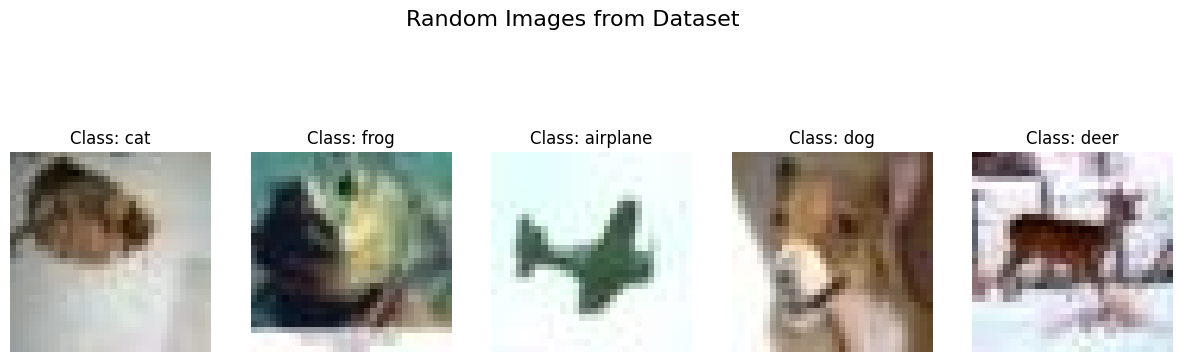

In [1]:
import os
import random
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your CIFAR-10 images directory
data_dir = '/Users/mx/Downloads/0-source_code/opencv_algorithms/images/CIFAR-10-images'

# Define transforms for the images
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to CIFAR-10 size
    transforms.ToTensor(),       # Convert image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load train and test datasets using ImageFolder
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Function to visualize random images
def visualize_random_images(dataset, num_images=5):
    """
    Visualizes random images from the dataset.

    Args:
        dataset: The dataset to sample images from.
        num_images (int): Number of images to display.
    """
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle("Random Images from Dataset", fontsize=16)
    
    for i in range(num_images):
        # Randomly select an index
        idx = random.randint(0, len(dataset) - 1)
        
        # Load the image and label
        image, label = dataset[idx]
        
        # Denormalize the image for visualization
        image = image.permute(1, 2, 0) * 0.5 + 0.5  # Undo normalization: [-1, 1] -> [0, 1]
        image = (image.numpy() * 255).astype('uint8')  # Convert to uint8
        
        # Convert to PIL image
        pil_image = Image.fromarray(image)
        
        # Display the image and label
        axes[i].imshow(pil_image)
        axes[i].set_title(f"Class: {dataset.classes[label]}")
        axes[i].axis("off")

    plt.show()

# Visualize random images from the training dataset
visualize_random_images(train_dataset, num_images=5)